In [61]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Pre-requisites
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Store the classifier models to save time
import joblib

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Classifiers from scikit-learn
from sklearn.linear_model import LogisticRegression

# Performance metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Regressors from scikit-learn
from sklearn.ensemble import RandomForestRegressor

# Performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Imbalanced dataset helpers
from imblearn.over_sampling import SMOTE  

In [62]:
# Loading the combined flight and weather data
df = pd.read_csv(r"C:\Users\httyd\Desktop\capstone\Data\part-00000-8bb2f01c-1fdf-42f2-b490-14b120ad5032-c000.csv")

In [63]:
df.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'FlightDate',
       'OriginAirportID', 'Origin', 'DestAirportID', 'Dest', 'CRSDepTime',
       'DepTime', 'DepDelayMinutes', 'DepDel15', 'CRSArrTime', 'ArrTime',
       'ArrDelayMinutes', 'ArrDel15', 'rounded_hour', 'AreaCode', 'Date',
       'Time', 'Temperature(°F)', 'DewPoint(°F)', 'Humidity(%)',
       'WindSpeed(mph)', 'WindGust(mph)', 'Pressure(in)', 'Precip(in)',
       'Condition', 'WindDir', 'Weatherrounded_hour'],
      dtype='object')

In [64]:
df['Condition'].value_counts(normalize=True)

Condition
Mostly Cloudy              0.29
Fair                       0.24
Cloudy                     0.16
Partly Cloudy              0.12
Light Rain                 0.06
                           ... 
Thunder and Hail           0.00
Heavy Snow / Windy         0.00
Small Hail                 0.00
Thunder and Hail / Windy   0.00
Light Sleet                0.00
Name: proportion, Length: 61, dtype: float64

In [65]:
df

,Year,Quarter,Month,DayofMonth,FlightDate,OriginAirportID,Origin,DestAirportID,Dest,CRSDepTime,...,Temperature(°F),DewPoint(°F),Humidity(%),WindSpeed(mph),WindGust(mph),Pressure(in),Precip(in),Condition,WindDir,Weatherrounded_hour
0,2020,1,1,11,2020-01-11,13204,MCO,11618,EWR,2230,...,66,59,78,14,0,29.94,0.0,Cloudy,180.00,01:00:00
1,2020,1,1,11,2020-01-11,14771,SFO,11618,EWR,1615,...,66,59,78,14,0,29.94,0.0,Cloudy,180.00,01:00:00
2,2020,1,1,15,2020-01-15,13930,ORD,11298,DFW,2213,...,59,47,64,15,0,29.56,0.0,Cloudy,0.00,01:00:00
3,2020,1,1,15,2020-01-15,13303,MIA,11298,DFW,2220,...,59,47,64,15,0,29.56,0.0,Cloudy,0.00,01:00:00
4,2020,1,1,15,2020-01-15,14107,PHX,11298,DFW,2158,...,59,47,64,15,0,29.56,0.0,Cloudy,0.00,01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682917,2021,4,12,30,2021-12-30,11298,DFW,11057,CLT,2043,...,63,61,93,6,0,29.13,0.0,Light Drizzle,225.00,23:00:00
682918,2021,4,12,30,2021-12-30,11292,DEN,11057,CLT,1735,...,63,61,93,9,0,29.13,0.0,Cloudy,225.00,23:00:00
682919,2021,4,12,30,2021-12-30,11292,DEN,11057,CLT,1735,...,63,61,93,6,0,29.13,0.0,Light Drizzle,225.00,23:00:00
682920,2021,4,12,30,2021-12-30,11618,EWR,11057,CLT,2201,...,63,61,93,9,0,29.13,0.0,Cloudy,225.00,23:00:00


In [66]:
# Convert columns to string type
df['Temperature(°F)'] = df['Temperature(°F)'].astype(str)
df['DewPoint(°F)'] = df['DewPoint(°F)'].astype(str)
df['Humidity(%)'] = df['Humidity(%)'].astype(str)
df['WindSpeed(mph)'] = df['WindSpeed(mph)'].astype(str)
df['WindGust(mph)'] = df['WindGust(mph)'].astype(str)
df['Pressure(in)'] = df['Pressure(in)'].astype(str)
df['Precip(in)'] = df['Precip(in)'].astype(str)
df['rounded_hour'] = df['rounded_hour'].astype(str)

# Remove non-numeric characters and convert to float
df['Temperature(°F)'] = df['Temperature(°F)'].str.replace('[^0-9.-]', '').astype(float)
df['DewPoint(°F)'] = df['DewPoint(°F)'].str.replace('[^0-9.-]', '').astype(float)
df['Humidity(%)'] = df['Humidity(%)'].str.replace('[^0-9.-]', '').astype(float)
df['WindSpeed(mph)'] = df['WindSpeed(mph)'].str.replace('[^0-9.-]', '').astype(float)
df['WindGust(mph)'] = df['WindGust(mph)'].str.replace('[^0-9.-]', '').astype(float)
df['Pressure(in)'] = df['Pressure(in)'].str.replace('[^0-9.-]', '').astype(float)
df['Precip(in)'] = df['Precip(in)'].str.replace('[^0-9.-]', '').astype(float)

df['rounded_hour'] = pd.to_datetime(df['rounded_hour'], format='%H:%M:%S').dt.hour.astype(float)




# Convert to int64
df['Temperature(°F)'] = df['Temperature(°F)'].astype('int64')
df['DewPoint(°F)'] = df['DewPoint(°F)'].astype('int64')
df['Humidity(%)'] = df['Humidity(%)'].astype('int64')
df['WindSpeed(mph)'] = df['WindSpeed(mph)'].astype('int64')
df['WindGust(mph)'] = df['WindGust(mph)'].astype('int64')
df['Pressure(in)'] = df['Pressure(in)'].astype('int64')
df['Precip(in)'] = df['Precip(in)'].astype('int64')
df['rounded_hour'] = df['rounded_hour'].astype('int64')


In [67]:

print(f"\nBefore Encoding Shape: {df.shape}", end="\n\n")
# print(df.info())
# Dropping columns with redundant or duplicate data
df.drop(columns=["FlightDate",
                 "OriginAirportID",
                 "DestAirportID",
                 "CRSArrTime",
                 "ArrTime",
                 "Weatherrounded_hour",
                 "Date",
                 "Time",
                 "AreaCode"],
        inplace=True)
# print(df.info())
labelEncoder = LabelEncoder()
df["Origin"] = labelEncoder.fit_transform(df["Origin"])
df["Dest"] = labelEncoder.fit_transform(df["Dest"])
df["Condition"] = labelEncoder.fit_transform(df["Condition"])
print(f"\nAfter Encoding Shape: {df.shape}", end="\n\n")
df[["Origin", "Dest"]]
df.to_csv("Data/flight_and_weather_encoded_pipe_line.csv");


Before Encoding Shape: (682922, 31)


After Encoding Shape: (682922, 22)



In [68]:
df = pd.read_csv("Data/flight_and_weather_encoded_pipe_line.csv", index_col=0);
print(f"\nShape: {df.shape}", end="\n\n")
print(df.info())


Shape: (682922, 22)

<class 'pandas.core.frame.DataFrame'>
Index: 682922 entries, 0 to 682921
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             682922 non-null  int64  
 1   Quarter          682922 non-null  int64  
 2   Month            682922 non-null  int64  
 3   DayofMonth       682922 non-null  int64  
 4   Origin           682922 non-null  int64  
 5   Dest             682922 non-null  int64  
 6   CRSDepTime       682922 non-null  int64  
 7   DepTime          682922 non-null  int64  
 8   DepDelayMinutes  682922 non-null  float64
 9   DepDel15         682922 non-null  float64
 10  ArrDelayMinutes  682922 non-null  float64
 11  ArrDel15         682922 non-null  float64
 12  rounded_hour     682922 non-null  int64  
 13  Temperature(°F)  682922 non-null  int64  
 14  DewPoint(°F)     682922 non-null  int64  
 15  Humidity(%)      682922 non-null  int64  
 16  WindSpeed(mph)   6829

In [69]:
labels = df[["ArrDel15", "ArrDelayMinutes"]]
features = df.drop(columns = ['ArrDel15', 'ArrDelayMinutes'])
print(len(features.columns))
print(len(labels.columns))
# Number of samples/observations/rows is greater than 100,000
print(f"\nDataset shape: {df.shape}")
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.20, random_state=42)
print(f"features_train shape: {features_train.shape} | features_test shape: {features_test.shape}")
print(f"labels_train shape: {labels_train.shape} | labels_test shape: {labels_test.shape}")
print(f"{features_train.shape[1]} Features: {features_train.columns.to_list()}")
del features 
del labels

20
2

Dataset shape: (682922, 22)
features_train shape: (546337, 20) | features_test shape: (136585, 20)
labels_train shape: (546337, 2) | labels_test shape: (136585, 2)
20 Features: ['Year', 'Quarter', 'Month', 'DayofMonth', 'Origin', 'Dest', 'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDel15', 'rounded_hour', 'Temperature(°F)', 'DewPoint(°F)', 'Humidity(%)', 'WindSpeed(mph)', 'WindGust(mph)', 'Pressure(in)', 'Precip(in)', 'Condition', 'WindDir']


In [70]:
classification_features_train, classification_features_test = features_train, features_test
classification_labels_train, classification_labels_test = labels_train["ArrDel15"], labels_test["ArrDel15"]
print(f"classification_features_train shape: {classification_features_train.shape} | classification_features_test shape: {classification_features_test.shape}")
print(f"classification_labels_train shape: {classification_labels_train.shape} | classification_labels_test shape: {classification_labels_test.shape}")

classification_features_train shape: (546337, 20) | classification_features_test shape: (136585, 20)
classification_labels_train shape: (546337,) | classification_labels_test shape: (136585,)


In [71]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


import lazypredict

from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split



import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

# Assuming 'df' is your DataFrame containing the dataset
# Assuming 'ArrDel15' and 'ArrDelayMinutes' are your target variables

X = df.drop(columns=['ArrDel15', 'ArrDelayMinutes','DepDelayMinutes','DepDel15'])

# Reshape y to be 1-dimensional if needed
y = df['ArrDel15'] 

# Apply Random Undersampling to balance the dataset
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# # Create a LazyClassifier
# clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# # Fit LazyClassifier
# models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# # Print the models and their performance
# print(models)


In [72]:
import xgboost as xgb

# Create a XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Accuracy:", accuracy)


XGBoost Accuracy: 0.8518104196155427


In [85]:
y_train.value_counts()

ArrDel15
0.00    87641
1.00    87567
Name: count, dtype: int64

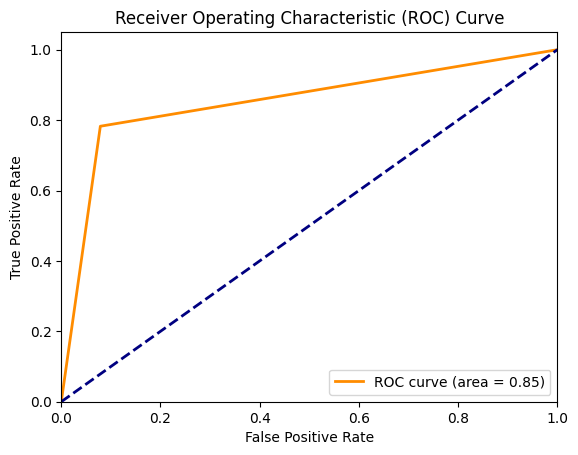

In [74]:

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


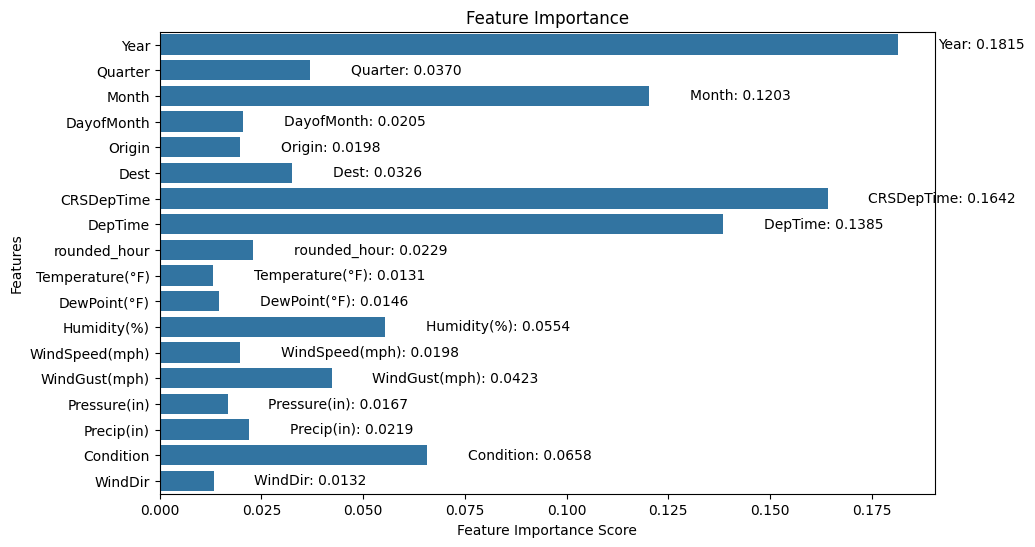

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'feature_names' is a list containing the actual feature names from your dataset
# Replace 'feature_names' with your actual list of feature names
feature_names = X_train.columns

# Get feature importances
feature_importance = xgb_classifier.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')

# Add feature names and importance scores to the plot
for i, (name, importance) in enumerate(zip(feature_names, feature_importance)):
    plt.text(importance + 0.01, i, f'{name}: {importance:.4f}', color='black', va='center')

plt.show()


In [82]:
import xgboost as xgb
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# Create an XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the regressor
xgb_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_regressor.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 0.10164625775432112
R-squared: 0.5934138085280398
Mean Absolute Error: 0.23690997920724421
Root Mean Squared Error: 0.3188201024940572


In [76]:
# import lazypredict

# from lazypredict.Supervised import LazyClassifier
# from sklearn.model_selection import train_test_split

# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models,predictions = clf.fit(classification_features_train_res, classification_features_test, classification_labels_train_res, classification_labels_test)
# models

In [86]:
clf = LogisticRegression().fit(X_train,y_train)
y_pred = clf.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 0.3952330943792521
R-squared: -0.5809368897351903
Mean Absolute Error: 0.3952330943792521
Root Mean Squared Error: 0.6286756670806116


In [78]:
# # Convert pandas Series to numpy array and reshape
# y_test_pred = clf.predict(classification_features_test)

In [79]:
# pd.crosstab(pd.Series(y_test_pred, name ='prediction'),
#            pd.Series(y_test_pred, name ='Actual'))

In [80]:
classification_report(classification_labels_test,y_test_pred)

NameError: name 'y_test_pred' is not defined

ValueError: continuous-multioutput format is not supported